In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import warnings

from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [2]:
# Function to remove outliers using Isolation Forest
def remove_outliers_isolation_forest(X, y, contamination=0.05, random_state=42):
    iso_forest = IsolationForest(contamination=contamination, random_state=random_state)
    preds = iso_forest.fit_predict(X)
    mask = preds != -1
    return X[mask], y[mask]

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and test sets (80% training, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

# Remove outliers from training set
X_train, y_train = remove_outliers_isolation_forest(X_train, y_train)

# Remove outliers from validation set
X_valid, y_valid = remove_outliers_isolation_forest(X_valid, y_valid)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print("Original training set size:", X_train_full.shape)
print("Cleaned training set size:", X_train.shape)


Original training set size: (16512, 8)
Cleaned training set size: (12548, 8)


In [3]:
# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and test sets (70% training, 30% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70% training, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_valid = scaler.transform(X_valid)      # Transform the validation data
X_test = scaler.transform(X_test)        # Transform the test data

# Model A - Sequential Model in Keras

In [4]:
# Define a simple Sequential model with two layers
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),  # Hidden layer with 30 neurons
    keras.layers.Dense(1)  # Output layer with 1 neuron
])

# Compile the model with mean squared error loss and SGD optimizer
model.compile(loss="mean_squared_error", optimizer="sgd")

# Early stopping callback to stop training when validation loss stops improving
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train, 
    epochs=100,  # Maximum number of epochs
    validation_data=(X_valid, y_valid),  # Validation data
    callbacks=[early_stopping],  # Early stopping callback
    batch_size=256,  # Batch size
    verbose=1  # Verbosity mode
)


Epoch 1/100
 1/40 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 8.0159

c:\Users\omarc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8191 - val_loss: 1.0221
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9003 - val_loss: 0.8205
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7805 - val_loss: 0.7596
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7262 - val_loss: 0.7094
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6642 - val_loss: 0.6738
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6328 - val_loss: 0.6423
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6179 - val_loss: 0.6190
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5928 - val_loss: 0.6038
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5633 - val_loss: 0.5827
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5704 - val_loss: 0.5698
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5519 - val_loss: 0.5601
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5471 - val_lo

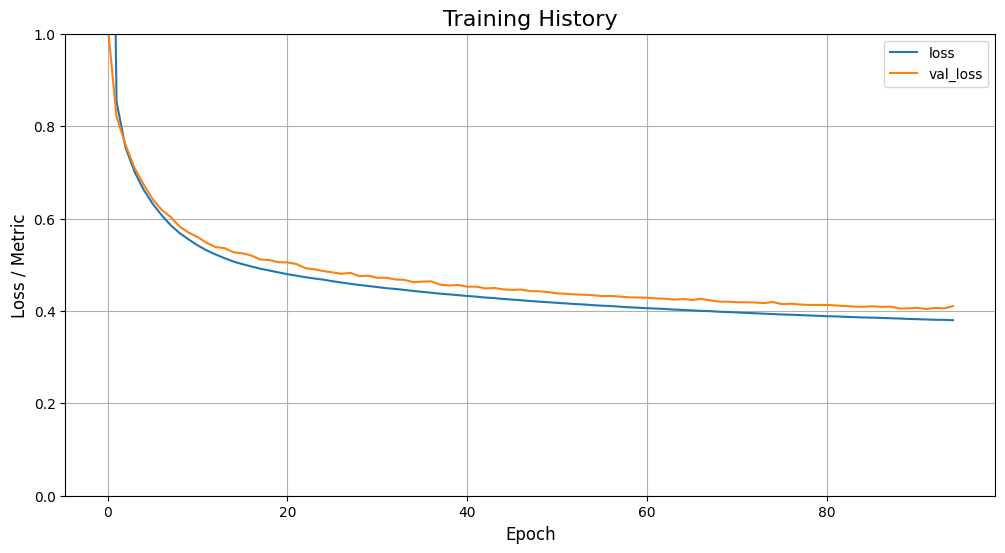

In [5]:
# Plot the training history of the model
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(pd.DataFrame(history.history))  # Plot the training history as a DataFrame
plt.grid(True)  # Add a grid to the plot
plt.gca().set_ylim(0, 1)  # Set Y-axis limits (adjust as needed)
plt.title("Training History", fontsize=16)  # Add a title to the plot
plt.xlabel("Epoch", fontsize=12)  # Label the X-axis
plt.ylabel("Loss / Metric", fontsize=12)  # Label the Y-axis
plt.legend(pd.DataFrame(history.history).columns, fontsize=10)  # Add a legend
plt.show()  # Display the plot


In [6]:
# Predict the target values for the validation set
y_pred = model.predict(X_valid)

# Display the first 5 predictions and their corresponding actual values
print("Sample prediction:", y_pred[:5].flatten())
print("Actual values:", y_valid[:5])


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
Sample prediction: [2.2487757 4.0168047 1.290189  2.7808964 0.5460594]
Actual values: [2.664 3.306 1.034 2.639 0.48 ]


In [7]:
# Compile the model with the specified loss function, optimizer, and metrics
# - Loss: "mean_squared_error" is used for regression tasks to minimize the squared differences between predicted and actual values.
# - Optimizer: "adam" is an adaptive learning rate optimization algorithm that works well in most cases.
# - Metrics: "mae" (Mean Absolute Error) is used to evaluate the model's performance by calculating the average absolute difference between predicted and actual values.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [8]:
# Function to print the proportions of data splits (training, validation, and test sets)
def print_data_split_proportions(X_train, X_valid, X_test):
    # Calculate the total number of samples across all splits
    total = len(X_train) + len(X_valid) + len(X_test)
    
    # Print the proportions of each split
    print("📊 Data Split Proportions (based on number of samples):")
    print(f"  - Training    : {len(X_train):5d} samples ({len(X_train)/total:.2%})")  # Training set proportion
    print(f"  - Validation  : {len(X_valid):5d} samples ({len(X_valid)/total:.2%})")  # Validation set proportion
    print(f"  - Test        : {len(X_test):5d} samples ({len(X_test)/total:.2%})")    # Test set proportion

# Call the function to display the data split proportions
print_data_split_proportions(X_train, X_valid, X_test)

📊 Data Split Proportions (based on number of samples):
  - Training    : 10113 samples (49.00%)
  - Validation  :  4335 samples (21.00%)
  - Test        :  6192 samples (30.00%)


In [9]:
# Import necessary metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to evaluate the model's performance on a given dataset
def evaluate_metrics(model, X, y, dataset_name="Test"):
    # Predict the target values using the model
    y_pred = model.predict(X).flatten()
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_pred)
    
    # Calculate R-squared (R²) score
    r2 = r2_score(y, y_pred)

    # Print the evaluation metrics
    print(f"📊 {dataset_name} Set Evaluation")
    print(f"  - MSE : {mse:.4f}")  # Display MSE
    print(f"  - MAE : {mae:.4f}")  # Display MAE
    print(f"  - R²  : {r2:.4f}")   # Display R² score
    
    # Return the calculated metrics
    return mse, mae, r2

In [10]:
# Evaluate the model's performance on the training set
# This will calculate and display metrics such as MSE, MAE, and R² for the training set
evaluate_metrics(model, X_train, y_train, dataset_name="Training")

# Evaluate the model's performance on the validation set
# This will calculate and display metrics such as MSE, MAE, and R² for the validation set
evaluate_metrics(model, X_valid, y_valid, dataset_name="Validation")

# Evaluate the model's performance on the test set
# This will calculate and display metrics such as MSE, MAE, and R² for the test set
evaluate_metrics(model, X_test, y_test, dataset_name="Test")

317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
📊 Training Set Evaluation
  - MSE : 0.3807
  - MAE : 0.4388
  - R²  : 0.7133
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
📊 Validation Set Evaluation
  - MSE : 0.4041
  - MAE : 0.4502
  - R²  : 0.7044
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
📊 Test Set Evaluation
  - MSE : 0.3890
  - MAE : 0.4449
  - R²  : 0.7036


(0.38901195664260424, 0.4449059150985461, 0.7036189947059723)